# Customer Churn Analysis
The objective of this project is to analyze customer churn data from a telecom company to identify key factors associated with customer attribution. The analysis focuses on customer demographics,service usage,contract types,and billing information to support retention-focused business decisions.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Cleaning
The TotalCharges column needs to be converted from text to numeric format.And there are rows with missing TotalCharges that need to be removed  to ensure accurate analysis.

In [20]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with missing TotalCharges
df = df.dropna(subset=["TotalCharges"])

## Overall Churn Rate
The charts will show the proportion of customers who have churned versus those who would have remained.Understanding the overall churn level would provide context for evaluating retention performance.

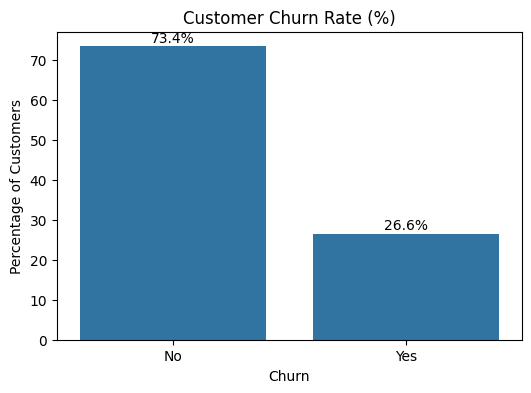

In [21]:
churn_pct = df["Churn"].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
sns.barplot(x=churn_pct.index, y=churn_pct.values)
plt.title("Customer Churn Rate (%)")
plt.ylabel("Percentage of Customers")

for i, value in enumerate(churn_pct.values):
    plt.text(i, value + 1, f"{value:.1f}%", ha="center")

plt.show()

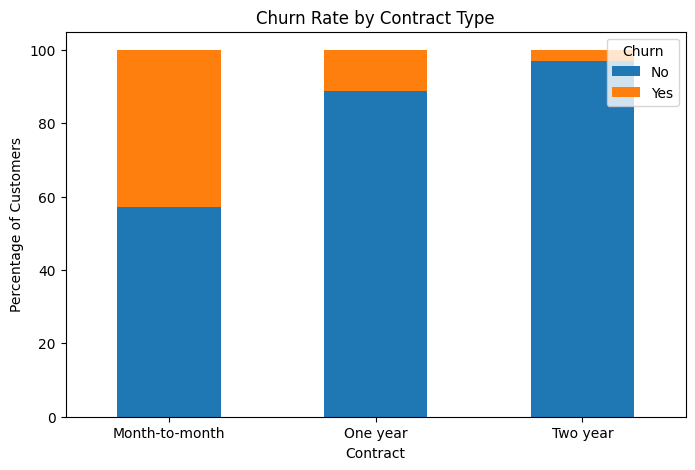

In [22]:
contract_churn = pd.crosstab(
    df["Contract"],
    df["Churn"],
    normalize="index"
) * 100

contract_churn.plot(
    kind="bar",
    stacked=True,
    figsize=(8,5)
)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Percentage of Customers")
plt.xticks(rotation=0)
plt.legend(title="Churn", loc="upper right")

plt.show()

## Churn  by Contract
Customers on month to month contracts show siginifcantly higher churn rates compared to customers on long-term contracts.This suggests that contracts length play a critical role in customer retention.

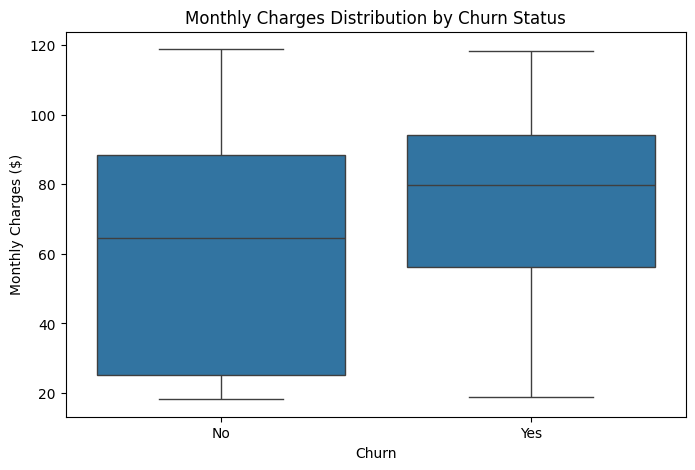

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Churn",
    y="MonthlyCharges",
    data=df
)
plt.title("Monthly Charges Distribution by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges ($)")
plt.show()

## Monthly Charges and Churn
Customers who churn tend to have higher monthly charges on average.This indicates that pricing and perceived value may influence churn behaviour.

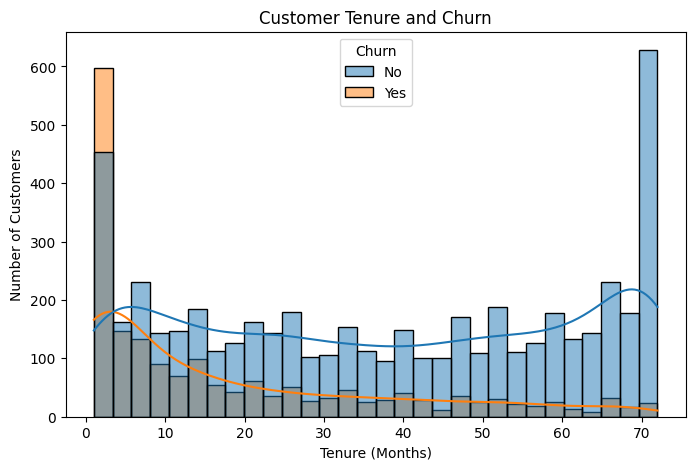

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="tenure",
    hue="Churn",
    bins=30,
    kde=True
)
plt.title("Customer Tenure and Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()

## Customer Tenure and Churn
Churn is more common among customers with shorter tenure.This suggests that early-stage customer exoerience is critical for retention.

## Conclusion
This analysis identified key factors associated with customer churn,including contract type,monthly charges,and customer tenure.The findings suggests that retention strategies should prioritize month-to-month customers,pricing optimization and improved onboarding experiences.